# Wideband decoding

## Imports and globals

In [10]:
# External
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('mu2e.mplstyle')

# Internal
import decoder as dc
# Print all classes defined in decoder
print([name for name in dir(dc) if isinstance(getattr(dc, name), type)])

['EWTWriter', 'HitWriter', 'gr', 'header', 'hit', 'reader', 'status', 'subevent', 'tqdm']


!ls /scratch/mu2e/mu2ecrv_crv_scorrodi_v3_03_00/OutputData -trhl

## Read and process data

In [43]:
filename = "wb_test_036.bin" # filename
reader = dc.reader(filename) # Initialise reader
reader.raw = False # Set raw flag
hit_writer = dc.HitWriter(n_samples=8) # Initialise hit writer
reader.get(verbose=0, writer=hit_writer) # Read the file
df = hit_writer.get() # retrieve data as df
display(df)

/scratch/mu2e/mu2ecrv_crv_scorrodi_v3_03_00/OutputData/wb_test_036.bin:  99%|████████████████████████████████████████████▌| 16.8M/17.0M [00:02<00:00, 6.72MB/s]


,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
0,20,89,1837,-1,48,98,77,34,40,40,19
1,22,106,77,-8,-6,159,421,387,221,210,178
2,22,107,77,-8,-4,195,510,500,329,227,193
3,27,92,3619,4,28,255,388,294,178,98,63
4,27,93,3619,-11,13,192,330,232,110,54,46
...,...,...,...,...,...,...,...,...,...,...,...
41054,99985,65,1621,-12,61,203,217,146,65,31,19
41055,99985,88,147,-9,55,141,89,25,18,16,3
41056,99985,89,147,-1,105,287,243,110,54,64,57
41057,99988,77,225,-10,29,136,202,155,63,18,9


## Filter data

In [27]:
# Filter columns starting with 's' (samples)
columns_to_mask = df.filter(like='s').columns
# Create a mask where all 's' columns are >= threshold
threshold = 100
mask = (df[columns_to_mask] >= threshold).all(axis=1)
# Drop the NaN rows
df = df.dropna()
# Display
display(df)

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
125,395.0,118.0,3045.0,48.0,119.0,136.0,92.0,50.0,42.0,58.0,54.0
1647,3972.0,111.0,2985.0,77.0,101.0,237.0,268.0,182.0,106.0,76.0,55.0
2115,5083.0,79.0,2432.0,54.0,134.0,139.0,110.0,79.0,109.0,112.0,63.0
3335,8020.0,114.0,2694.0,66.0,130.0,149.0,94.0,61.0,53.0,52.0,40.0
5186,12568.0,113.0,3687.0,114.0,126.0,133.0,128.0,75.0,51.0,56.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...
38384,93297.0,71.0,260.0,43.0,111.0,153.0,156.0,153.0,109.0,83.0,82.0
38489,93453.0,76.0,2249.0,60.0,128.0,163.0,115.0,69.0,130.0,127.0,59.0
38624,93827.0,66.0,2395.0,58.0,120.0,144.0,152.0,122.0,70.0,49.0,40.0
40275,98010.0,114.0,668.0,50.0,132.0,139.0,115.0,75.0,46.0,49.0,45.0


## Plot data

Text(0.5, 1.0, 'Samples > 100')

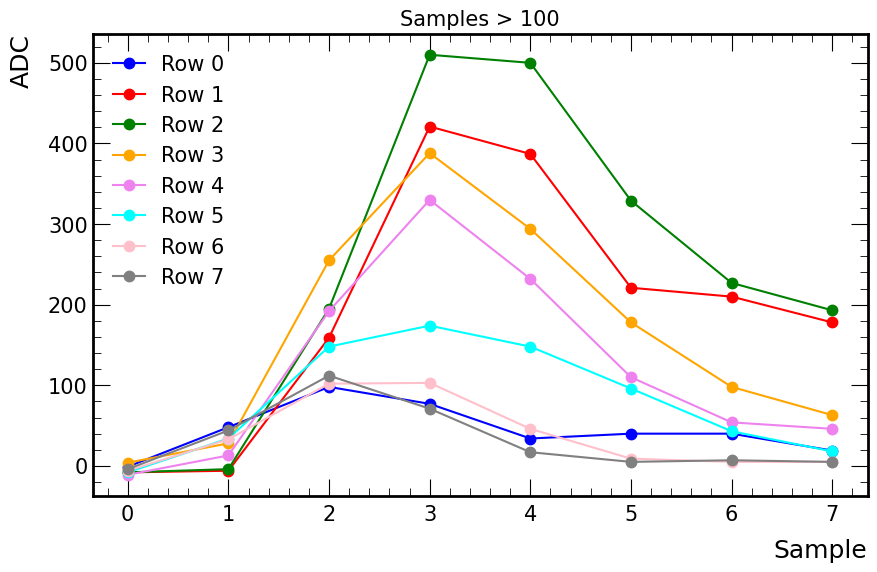

In [51]:
n_samples = 8
row_multiplier = 1
fig, ax = plt.subplots(figsize=(10,6))
for i_sample in range(n_samples):
    # Select 
    # plt.plot(df.iloc[i_sample+5][["s%i" % i for i in range(n_samples)]],'.',ms=15, label=f"{i_sample+5}", linestyle="--")
    plt.plot(
        df.iloc[row_multiplier*i_sample][["s%i" % i for i in range(n_samples)]].values,
        '.',
        ms=15,
        label=f"Row {row_multiplier*i_sample}",
        linestyle="-"
    )
plt.legend(loc="best")
plt.ylabel("ADC")
plt.xlabel("Sample")
plt.title(f"Samples > {threshold}")

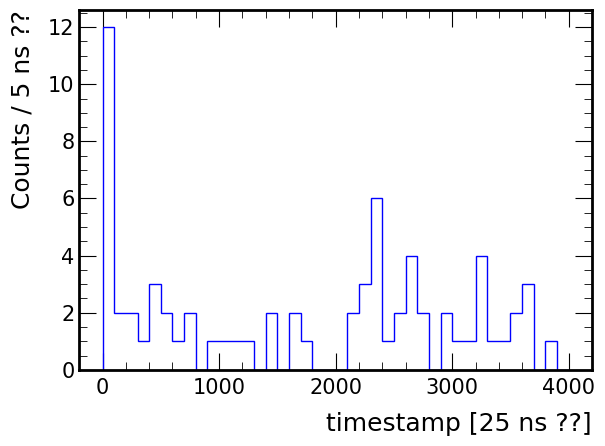

In [37]:
plt.hist(
    df.time.values.astype(np.uint16) & 0xfff, 
    bins=np.arange(0, 0xfff, 100),
    histtype='step'
);
# plt.hist(df.time.values & 0xff);
plt.xlabel("timestamp [25 ns ??]")
plt.ylabel("Counts / 5 ns ??")
plt.tight_layout()

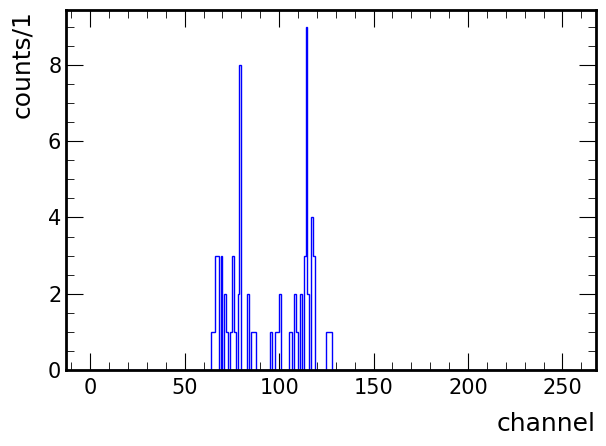

In [38]:
plt.hist(df.channel, bins=np.arange(0,64*4,1), histtype='step');
#plt.hist(df.time.values & 0xff);
plt.xlabel("channel")
plt.ylabel("counts/1")
plt.tight_layout()

(0.0, 192.0)

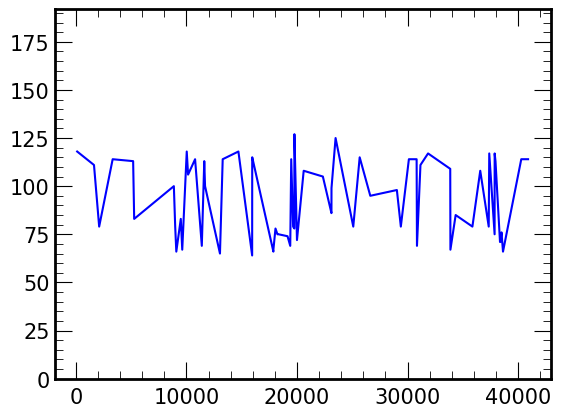

In [39]:
plt.plot(df.channel)
plt.ylim([0,64*3])
plt.ylim([0,64*3])
# plt.scatter(df.channel)

In [40]:
df[df.channel > 1000]

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7


In [41]:
df.iloc[60-10:60+10]

,EWT,channel,time,s0,s1,s2,s3,s4,s5,s6,s7
30815,74766.0,114.0,2114.0,42.0,93.0,158.0,150.0,96.0,62.0,59.0,47.0
30846,74841.0,69.0,2758.0,46.0,102.0,142.0,143.0,99.0,60.0,61.0,85.0
31161,75620.0,111.0,3501.0,70.0,116.0,177.0,181.0,103.0,90.0,81.0,41.0
31849,77328.0,117.0,149.0,41.0,118.0,146.0,116.0,66.0,43.0,48.0,40.0
33854,82130.0,109.0,2786.0,43.0,107.0,126.0,115.0,67.0,73.0,91.0,60.0
33870,82187.0,67.0,2168.0,43.0,107.0,145.0,87.0,46.0,53.0,71.0,58.0
34344,83233.0,85.0,1008.0,42.0,118.0,134.0,99.0,63.0,61.0,65.0,41.0
35858,86822.0,79.0,2636.0,64.0,118.0,141.0,144.0,98.0,58.0,54.0,45.0
36567,88628.0,108.0,559.0,43.0,98.0,143.0,168.0,102.0,50.0,52.0,40.0
37333,90637.0,79.0,2223.0,44.0,130.0,173.0,233.0,265.0,194.0,106.0,62.0


99553.0
395.0 None


Text(1, 0, 'EWT')

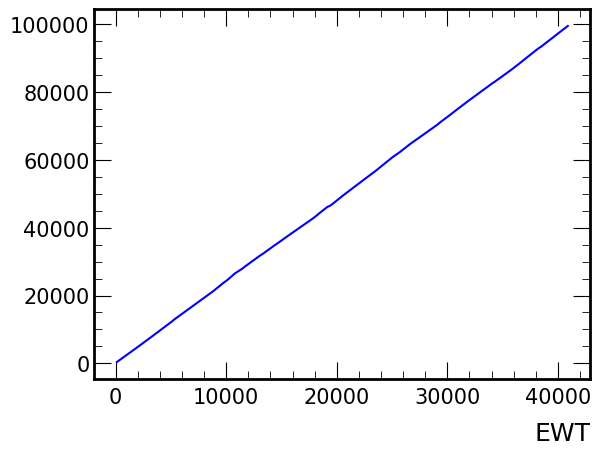

In [42]:
print(df['EWT'].min(), print(df['EWT'].max()))
plt.plot(df['EWT'])
plt.xlabel("EWT")